In [1]:
# import os
from scipy.fft import rfft, fft, fftfreq, ifft
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
directory = open("C:/Users/Lenovo/Desktop/IITH & STUDY/Sem 6/CDAM/Task2/MAIL_TO_REG_STUD_214275_2059189_20230225_102209_284.csv")
# for filename in os.listdir(directory):
#     f = os.path.join(directory, filename)
dset = pd.read_csv(directory,skip_blank_lines = True, comment = '#',header = 0)
data = dset[['decimal date', 'average']]
data

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Lenovo/Desktop/IITH & STUDY/Sem 6/CDAM/Task2/MAIL_TO_REG_STUD_214275_2059189_20230225_102209_284.csv'

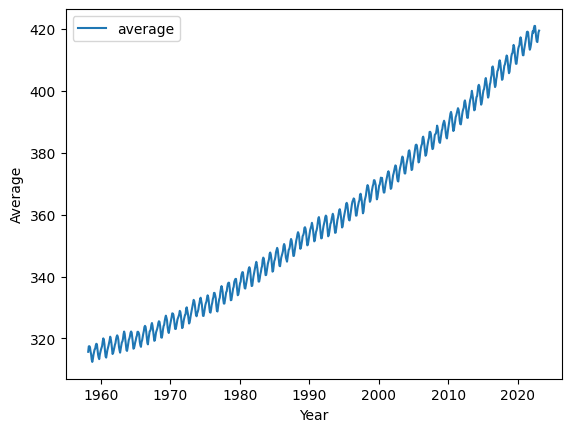

In [46]:
data.plot('decimal date','average')
plt.ylabel('Average')
plt.xlabel('Year')
plt.show()

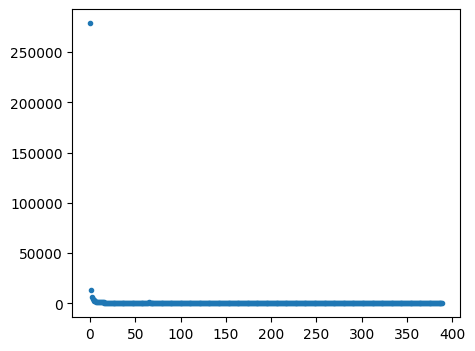

In [76]:
y = np.array(data['average'])
fq = rfft(y)
egeg = np.array(np.abs(fq))
plt.figure(figsize=(5,4),dpi = 100)
plt.plot(egeg,'.')

### Now we can see that frequency of the data "average" is 0 that means its close to straight line but when we perform the quadratic fit it is much better than straight line fit

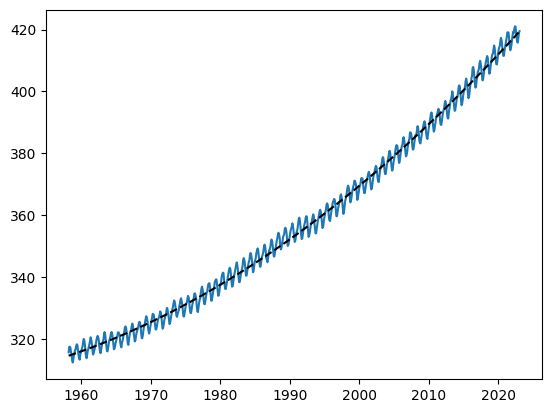

In [48]:
x = dset['decimal date']
y = dset['average']
coef = np.polyfit(x,y,2)
# m, b = coef # linear
# print('slope', m)
# print('intercept', b)
# # print('eq', m*dset['decimal date'] + b)
# lnr_mdl = m*dset['decimal date'] + b
poly1d_fn = np.poly1d(coef) 
quad_mdl = poly1d_fn 
# poly1d_fn is now a function which takes in x and returns an estimate for y

m,b = plt.plot(x,y, x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker

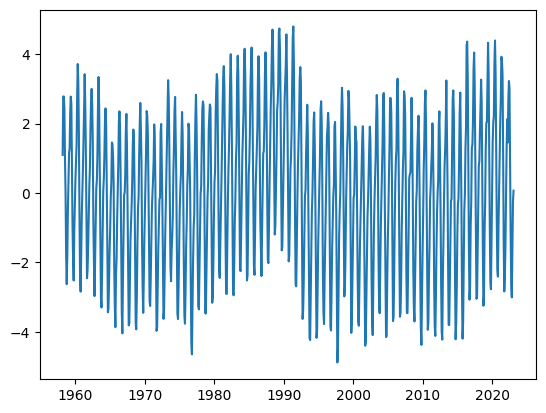

In [49]:
mod_y = y - quad_mdl(x)
plt.plot(x,mod_y)
plt.show()

In [50]:
def normalize(x):
    xmax = x.max()
    xmin = x.min()
    x = (x - xmin)/(xmax - xmin)
    return x
def maxinij(arr, i, j):
    return  (arr[i:j].argmax() + i), arr[i:j].max()

2  -  291.1814820838492
65  -  1100.6110914007463
130  -  300.02393971388096


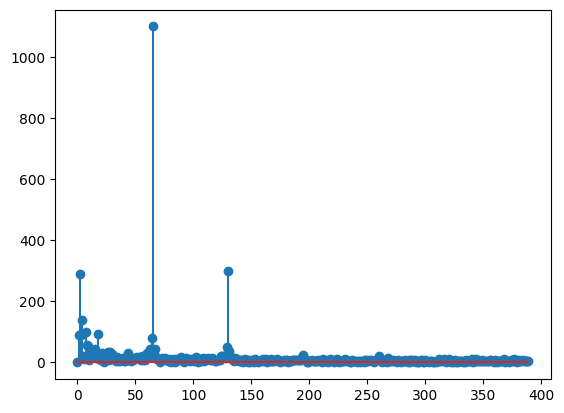

In [61]:
Y = (rfft(np.array(mod_y)))
# Y = normalize(np.abs(Y))
# _y = Y[:int((len(Y)-1)/2)]
_y = np.abs(Y)

id1 ,f1 = maxinij(_y, 0, 50)
print(id1 ,' - ' , f1)

id2 ,f2 = maxinij(_y, 51, 100)
print(id2 ,' - ' , f2)

id3 ,f3 = maxinij(_y, 101, 150)
print(id3 ,' - ' ,f3)

id = np.array([id1,id2,id3])
f_ = np.array([f1,f2,f3])

plt.stem(_y[:])
plt.show()

In [62]:
def ft_freq_plot(x_Lim_Min = 0,x_Lim_Max = 4000, ID = id1, dpi=100):
    t = np.arange(x_Lim_Max)
    plt.figure(figsize = (10,4), dpi=dpi)
    npixx = np.array((2.0*np.pi*t)/ID)
    y_pred = Y[ID].real*np.sin(npixx) +  Y[ID].imag*np.cos(npixx)
    y_pred_nml = normalize(y_pred)
    plt.plot(t,y_pred_nml)
    plt.ylim(-1,2)
    plt.xlim(x_Lim_Min,x_Lim_Max)
    plt.show()
#     return y_pred_nml

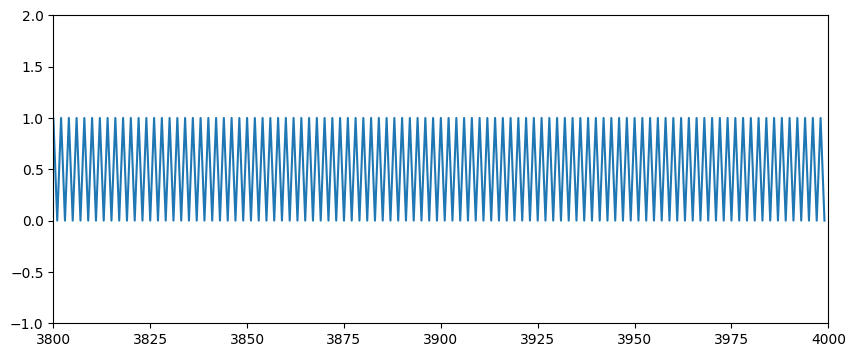

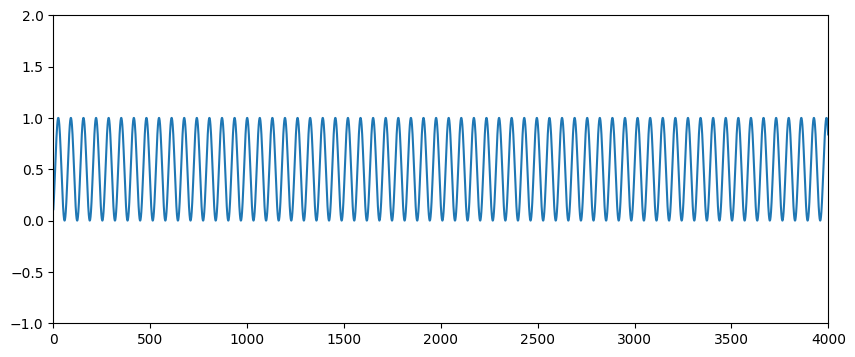

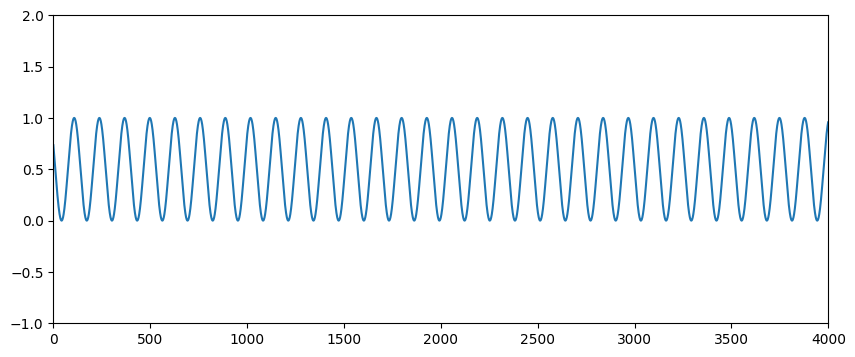

In [63]:
# x = np.arange(20)
# y = np.sin(x) *np.cos(x)
# plt.plot(x,y)
ft_freq_plot(3800,4000, id1)
ft_freq_plot(0,4000, id2)
ft_freq_plot(0,4000, id3)

In [64]:
def eqn(x_Lim_Min = 0,x_Lim_Max = 4000, ID = id1):
    t = np.arange(x_Lim_Max)
    npixx = np.array((2.0*np.pi*t)/ID)
    y_pred = Y[ID].real*np.sin(npixx) +  Y[ID].imag*np.cos(npixx)
    y_pred_nml = normalize(y_pred)
    return y_pred_nml

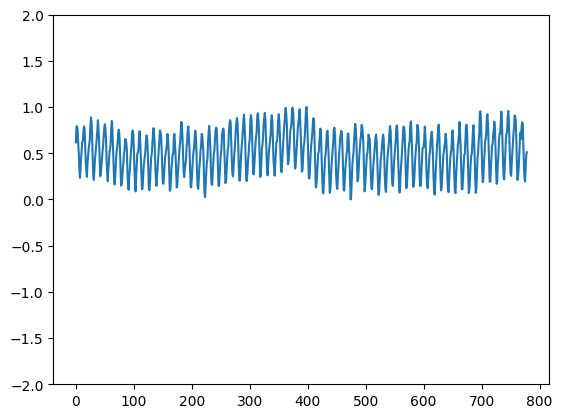

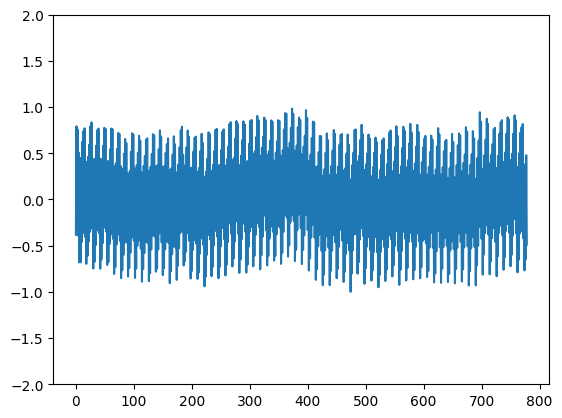

In [65]:
# ymax = dset['average'].max()
# ymin = dset['average'].min()
# #normalize
# y = dset['average']
# y = ( y - ymin )/(ymax - ymin)
# x = dset['decimal date']
# # xmax = x.max()
# # xmin = x.min()
# # #normalize
# # x = ( x - xmin )/(xmax - xmin)

# plt.plot(x,y)

nml_mod_y = normalize(mod_y)
plt.plot(nml_mod_y)
plt.ylim(-2,2)
plt.show()

nml_mod_y_id1 = nml_mod_y - eqn(0, 779, id2)
plt.plot(nml_mod_y_id1)
plt.ylim(-2,2)
plt.show()

# nml_mod_y_id1_2 = nml_mod_y_id1 - eqn(0, 779, id2)
# plt.plot(nml_mod_y_id1_2)
# plt.ylim(-2,2)
# plt.show()

# nml_mod_y_id1_3 = nml_mod_y_id1_2 - eqn(0, 779, id3)
# plt.plot(nml_mod_y_id1_3)
# plt.ylim(-2,2)
# plt.show()


### From above graph we can see that we need to first substract then take fft again to find the appropriate freq.

2  -  29.66832331702319
65  -  113.51221311940206
130  -  31.30961625714955
389  -  248.1788449906995


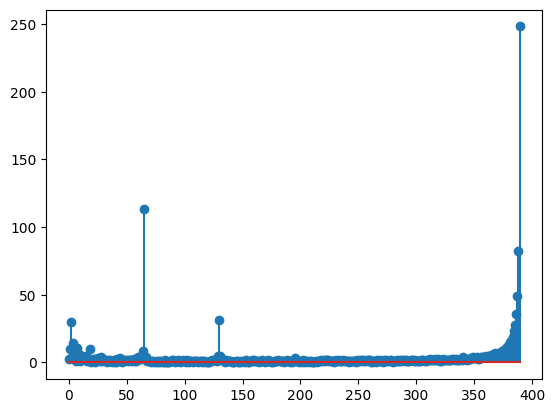

In [67]:
Y = (rfft(np.array(nml_mod_y_id1)))
# Y = normalize(np.abs(Y))
# _y = Y[:int((len(Y)-1)/2)]
_y = np.abs(Y)

id1 ,f1 = maxinij(_y, 0, 50)
print(id1 ,' - ' , f1)

id2 ,f2 = maxinij(_y, 51, 100)
print(id2 ,' - ' , f2)

id3 ,f3 = maxinij(_y, 101, 150)
print(id3 ,' - ' ,f3)

id4 ,f4 = maxinij(_y, 350, 400)
print(id4 ,' - ' ,f4)

id = np.array([id1,id2,id3,id4])
f_ = np.array([f1,f2,f3,f4])

plt.stem(_y)
plt.show()

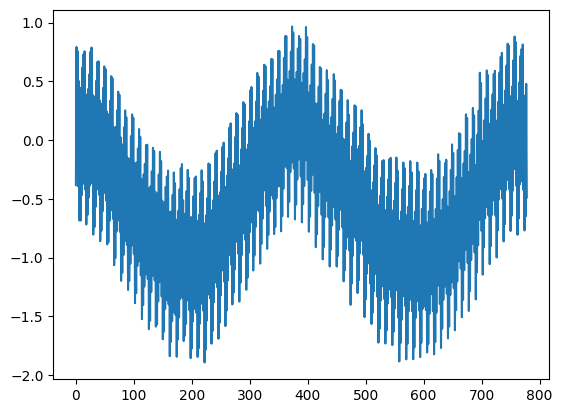

In [68]:
nml_mod_y_id4 = nml_mod_y_id1 - eqn(0, 779, id4)
plt.plot(nml_mod_y_id4)
plt.show()

0  -  386.13273762678307
65  -  113.51201282090987
130  -  31.309682850062654
389  -  248.1788450525198


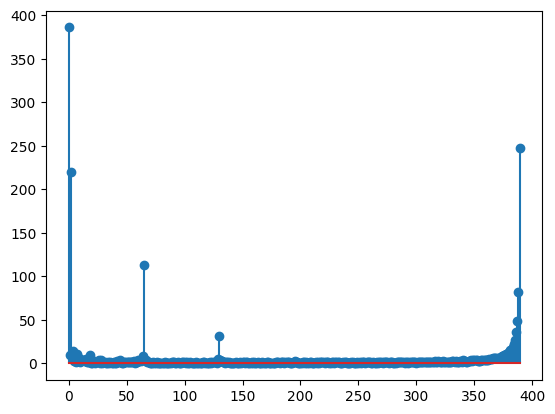

In [77]:
Y = (rfft(np.array(nml_mod_y_id4)))
# Y = normalize(np.abs(Y))
# _y = Y[:int((len(Y)-1)/2)]
_y = np.abs(Y)

id1 ,f1 = maxinij(_y, 0, 50)
print(id1 ,' - ' , f1)

id2 ,f2 = maxinij(_y, 51, 100)
print(id2 ,' - ' , f2)

id3 ,f3 = maxinij(_y, 101, 150)
print(id3 ,' - ' ,f3)

id4 ,f4 = maxinij(_y, 350, 400)
print(id4 ,' - ' ,f4)

id = np.array([id1,id2,id3,id4])
f_ = np.array([f1,f2,f3,f4])

plt.stem(_y)
plt.show()

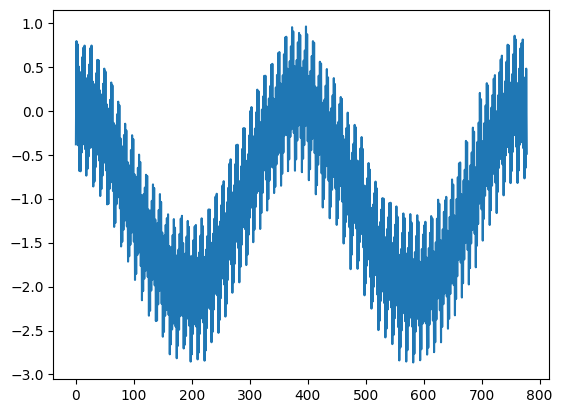

In [71]:
nml_mod_y_id4_1 = nml_mod_y_id4 - eqn(0, 779, id4)
plt.plot(nml_mod_y_id4_1)
plt.show()

0  -  775.1378120027115
65  -  113.51181252381973
130  -  31.30974944333015
389  -  248.17884511434005


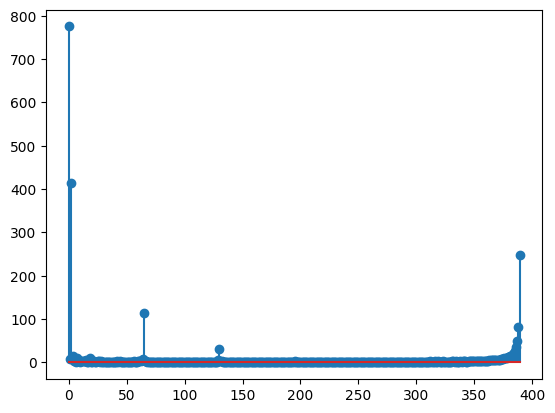

In [73]:
Y = (rfft(np.array(nml_mod_y_id4_1)))
# Y = normalize(np.abs(Y))
# _y = Y[:int((len(Y)-1)/2)]
_y = np.abs(Y)

id1 ,f1 = maxinij(_y, 0, 50)
print(id1 ,' - ' , f1)

id2 ,f2 = maxinij(_y, 51, 100)
print(id2 ,' - ' , f2)

id3 ,f3 = maxinij(_y, 101, 150)
print(id3 ,' - ' ,f3)

id4 ,f4 = maxinij(_y, 350, 400)
print(id4 ,' - ' ,f4)

id = np.array([id1,id2,id3,id4])
f_ = np.array([f1,f2,f3,f4])

plt.stem(_y)
plt.show()